In [55]:
import cv2
import numpy as np
import matplotlib.pylab as plt
import scipy

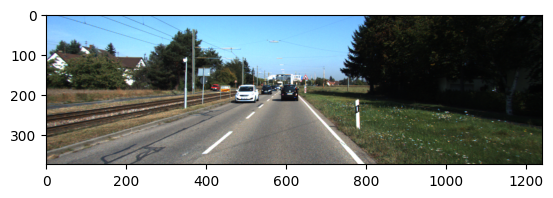

In [56]:
image = cv2.imread("roads\\um_000034.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)

plt.imshow(image)
plt.show()


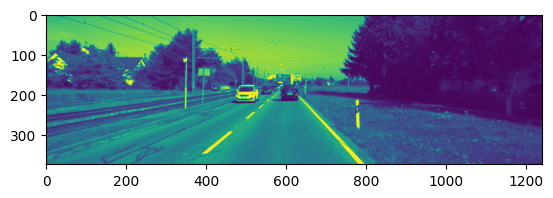

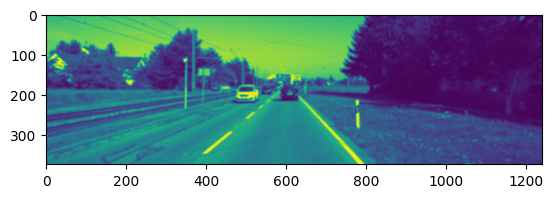

In [63]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
meanFilter = np.ones((5,5))/25
convolutionImage = scipy.ndimage.convolve(gray_image, meanFilter)
plt.imshow(gray_image)
plt.show()
plt.imshow(convolutionImage)
plt.show()

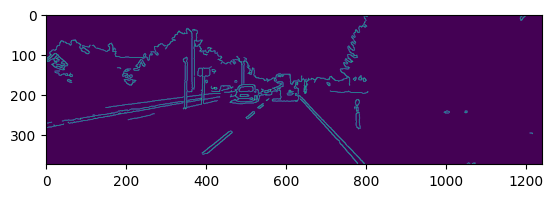

In [64]:
canny_image = cv2.Canny(convolutionImage, 100, 200)

plt.imshow(canny_image)
plt.show()

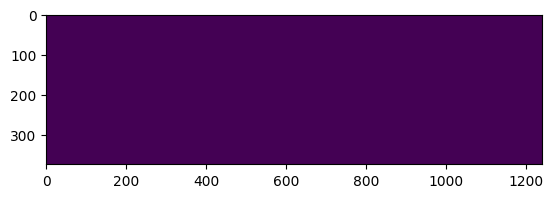

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [65]:
# 375 heigth 1242 width
image_heigth = image.shape[0]
image_width = image.shape[1]
# channel_count = image.shape[2]
# print(str(image_heigth), str(image_width), str(channel_count))

# 3 nokta belirleniyor
region_of_interest_vertices = [
    (0, image_heigth),
    (image_width/2, image_heigth/2),
    (image_width, image_heigth)
]

# [0, 0, 0, 0, ...]
mask = np.zeros_like(canny_image)
plt.imshow(mask)
plt.show()

print(mask)

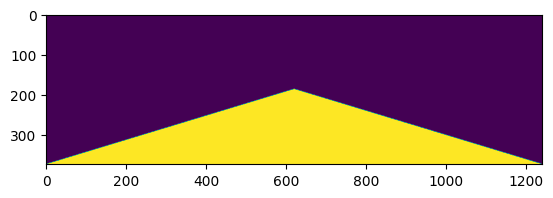

255


In [66]:
# (255, 255, 255, 255, ....)
# match_mask_color = (255,) * channel_count
match_mask_color = 255
cv2.fillPoly(mask, np.array([region_of_interest_vertices], np.int32), match_mask_color)

plt.imshow(mask)
plt.show()

print(match_mask_color)

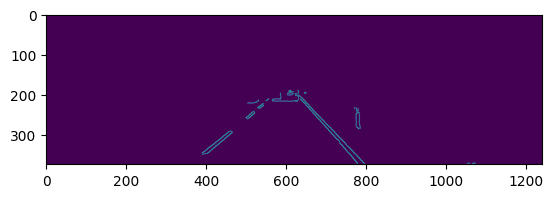

In [67]:
masked_image = cv2.bitwise_and(canny_image, mask)

plt.imshow(masked_image)
plt.show()

In [76]:
lines = cv2.HoughLinesP(masked_image,
                        rho=2,
                        theta=np.pi/60,
                        threshold=100,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=100)

print(lines)

[[[626 198 735 319]]

 [[392 347 553 216]]

 [[632 204 726 298]]

 [[625 198 749 336]]

 [[403 348 458 303]]]


In [77]:
coordi_line = []
coordi_lane_m = []
if lines is not None:
    for line in lines:
        for x1, y1, x2, y2 in line:
            coordi_line.append([x1, image_heigth-y1, x2, image_heigth-y2])
            coordi_lane_m.append(((image_heigth-y2) - (image_heigth-y1)) / (x2 - x1))

print(image_heigth, image_width)
print(coordi_line)       
print(coordi_lane_m) 

375 1242
[[626, 177, 735, 56], [392, 28, 553, 159], [632, 171, 726, 77], [625, 177, 749, 39], [403, 27, 458, 72]]
[-1.110091743119266, 0.8136645962732919, -1.0, -1.1129032258064515, 0.8181818181818182]


In [78]:
def draw_lines(original_image, lines_array):
    img = np.copy(original_image)
    blank_image = np.zeros((img.shape[0], img.shape[1], img.shape[2]),
                           dtype=np.uint8)
    
    if lines is not None:
        for count, line in enumerate(lines_array):
            # coordinates of lines
            for x1, y1, x2, y2 in line:
                cv2.line(blank_image,            # resmin üzerinde yazılacak
                        (x1, y1),       # çizginin başlangıç koordinatı
                        (x2, y2),       # çizginin ikinci koordinatı
                        (0,255,0),      # çizgi rengi
                        thickness=2)    # kalınlığı
                cv2.putText(blank_image, 
                            str(coordi_lane_m[count]), 
                            (x1, y1),
                            cv2.FONT_HERSHEY_PLAIN,
                            1,
                            (0,255,0),
                            2,
                            cv2.LINE_AA)
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)        
    return img

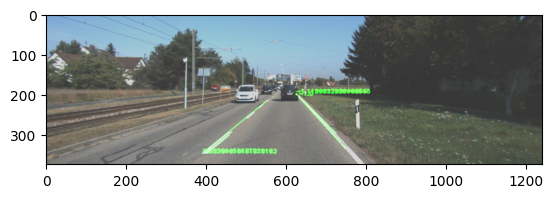

In [79]:
image_with_lines = draw_lines(image, lines)

plt.imshow(image_with_lines)
plt.show()